In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, io
from pandas import Series, DataFrame, read_table
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Data Analysis and Exploration


## User Data


### Exploratory Data Analysis:


In [3]:
df_users = pd.read_csv("BX-Users.csv", delimiter=",", encoding="latin-1")
df_users.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  float64
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.4+ MB
None


In [5]:
print(df_users.isnull().sum())

user_id          0
Location         1
Age         110763
dtype: int64


In [9]:
print("Number of unique users:\n")
print(df_users.nunique())

Number of unique users:

user_id     278859
Location     57339
Age            165
dtype: int64


In [7]:
print(df_users.describe())

                 Age
count  168096.000000
mean       34.751434
std        14.428097
min         0.000000
25%        24.000000
50%        32.000000
75%        44.000000
max       244.000000


In [10]:
df_users["user_id"] = pd.to_numeric(df_users["user_id"], errors="coerce")
df_users = df_users.sort_values(by=["user_id"])
df_users.reset_index(drop=True, inplace=True)
df_users.head()

,user_id,Location,Age
0,1.0,"nyc, new york, usa",NaN
1,2.0,"stockton, california, usa",18.0
2,3.0,"moscow, yukon territory, russia",NaN
3,4.0,"porto, v.n.gaia, portugal",17.0
4,5.0,"farnborough, hants, united kingdom",NaN


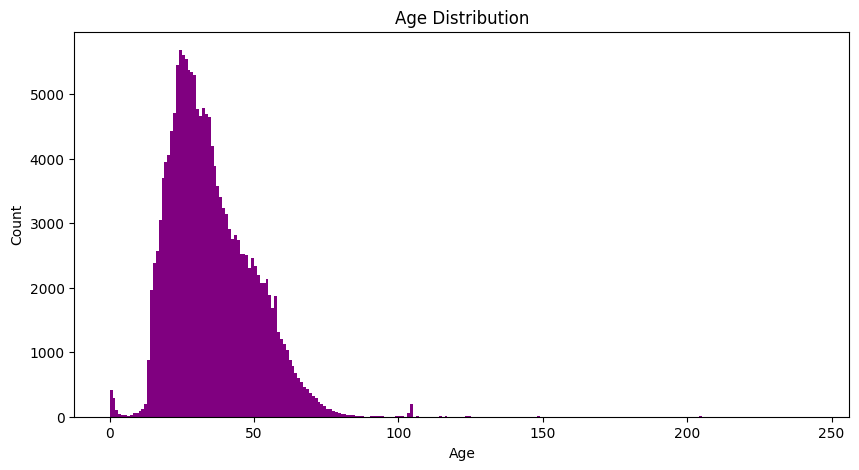

In [12]:
# Plot the age distribution of users
def plot_age_distribution(df):
    plt.figure(figsize=(10, 5))
    plt.hist(
        df["Age"], bins=np.arange(df["Age"].min(), df["Age"].max() + 1), color="purple"
    )
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.title("Age Distribution")
    plt.show()


plot_age_distribution(df_users)

## Book Data


### Exploratory Data Analysis


In [ ]:
df_books = pd.read_csv("BX-Books.csv", delimiter=",", encoding="latin-1")
df_books.head()

In [ ]:
print(df_books.info())

In [ ]:
df_books.isna().any()

In [ ]:
print(df_books.isnull().sum())

In [ ]:
unique_isbn = df_books["isbn"].nunique()
print(f"Number of unique isbn: {unique_isbn}")

### Data Preparation


In [ ]:
df_books = df_books.sort_values(by=["book_title", "isbn"], ascending=[0, 1])
df_books.reset_index(drop=True, inplace=True)

In [ ]:
df_books["year_of_publication"] = pd.to_numeric(
    df_books["year_of_publication"], errors="coerce"
)

In [ ]:
df_books.head()

## Ratings Data


### Exploratory Data Analysis


In [ ]:
df_ratings = pd.read_csv("BX-Book-Ratings.csv", delimiter=",", encoding="latin-1")

In [ ]:
df_ratings.head()

In [ ]:
print(df_ratings.info())

In [ ]:
nunique_rating_user_id = df_ratings["user_id"].nunique()
print(f"Unique number of user_id: {nunique_rating_user_id}")

unique_rating_isbn = df_ratings["isbn"].nunique()
print(f"Unique number of isbn: {unique_rating_isbn}")

In [ ]:
df_ratings.isnull().sum()

In [ ]:
sns.displot(df_ratings["rating"], kde=True)

### Data Preparation


In [ ]:
df_ratings = df_ratings[df_ratings["rating"] != 0]

In [ ]:
df_ratings.head()

In [ ]:
# df_ratings = df_ratings[df_ratings["rating"] > 4]
# df_ratings.head()

In [ ]:
df_book_ratings = pd.merge(df_ratings, df_books, on="isbn")
df_book_ratings = df_book_ratings[["user_id", "isbn", "book_title", "rating"]]
df_book_ratings = df_book_ratings.sort_values(
    ["isbn", "book_title"], ascending=[0, 0]
).reset_index(drop=True)

df_book_ratings.head()

In [ ]:
df_book_ratings.info()

In [ ]:
user_id_idx_map = {
    user: i for i, user in enumerate(df_book_ratings["user_id"].unique())
}

In [ ]:
df_book_ratings["user_id_idx"] = df_book_ratings["user_id"].map(user_id_idx_map)

In [ ]:
df_book_ratings.head()

In [ ]:
isbn_idx_map = {isbn: i for i, isbn in enumerate(df_book_ratings["isbn"].unique())}

In [ ]:
df_book_ratings["isbn_idx"] = df_book_ratings["isbn"].map(isbn_idx_map)

In [ ]:
df_book_ratings.head()

In [ ]:
df_book_ratings.sort_values(by=["user_id_idx", "isbn_idx"], inplace=True)
df_book_ratings.reset_index(drop=True, inplace=True)

In [ ]:
df_book_ratings.head()

In [ ]:
ratings_matrix = df_book_ratings.pivot_table(
    index="user_id_idx", columns="isbn_idx", values="rating"
).reset_index(drop=True)

In [ ]:
ratings_matrix.head()

In [ ]:
ratings_matrix.info()

In [ ]:
# get the column names of the ratings matrix
isbn_idx_7 = ratings_matrix[7]
isbn_idx_7.head()

In [ ]:
isbn_idx_7.info()

In [ ]:
similarbooks = ratings_matrix.corrwith(isbn_idx_7)
similarbooks = similarbooks.dropna()
df = pd.DataFrame(similarbooks)
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the ratings matrix into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    ratings_matrix.index, ratings_matrix.values, test_size=0.25
)